# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

### Projeto nº 16

### Professor: Ahirton Lopes (Machine Learning: Aula 6) -- https://github.com/ahirtonlopes/Mastering-Machine-Learning

### Detecção de fraude com SVM

[Credit Card Data](https://www.kaggle.com/dalpozz/creditcardfraud)

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_fraud_percentage():
    df = pd.read_csv('creditcard.csv')
    return (df[df['Class']==1].shape[0]/df.shape[0]) * 100

get_fraud_percentage()

0.1727485630620034

In [3]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('creditcard.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
def get_dummy_classifier_accuracy_and_recall():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    dc = DummyClassifier()
    dc.fit(X_train, y_train)

    y_pred=dc.predict(X_test)

    rc = recall_score(y_test, y_pred)
    acc = dc.score(X_test, y_test)
    return (acc, rc)

dummyAccuracy, dummyRecall = get_dummy_classifier_accuracy_and_recall()

print("Dummy Accuracy: ", dummyAccuracy)
print("Dummy Recall: ", dummyRecall)

Dummy Accuracy:  0.9983146540827504
Dummy Recall:  0.0


In [5]:
def get_accuracy_recall_and_precision():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    svc=SVC()
    svc.fit(X_train, y_train)
    y_pred=svc.predict(X_test)

    acc=svc.score(X_test, y_test)
    rc=recall_score(y_test, y_pred)
    pc=precision_score(y_test, y_pred)

    return (acc,rc,pc)

accuracy, recall, precision = get_accuracy_recall_and_precision()

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision:", precision)

Accuracy:  0.9983146540827504
Recall:  0.0
Precision: 0.0


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
def get_confusion_matrix():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc=SVC(C=1e9, gamma=1e-07)
    svc.fit(X_train, y_train)

    y_df = svc.decision_function(X_test)

    cm=confusion_matrix(y_test, y_df > -220)

    return cm

get_confusion_matrix()

array([[16567, 54515],
       [   12,   108]], dtype=int64)

c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


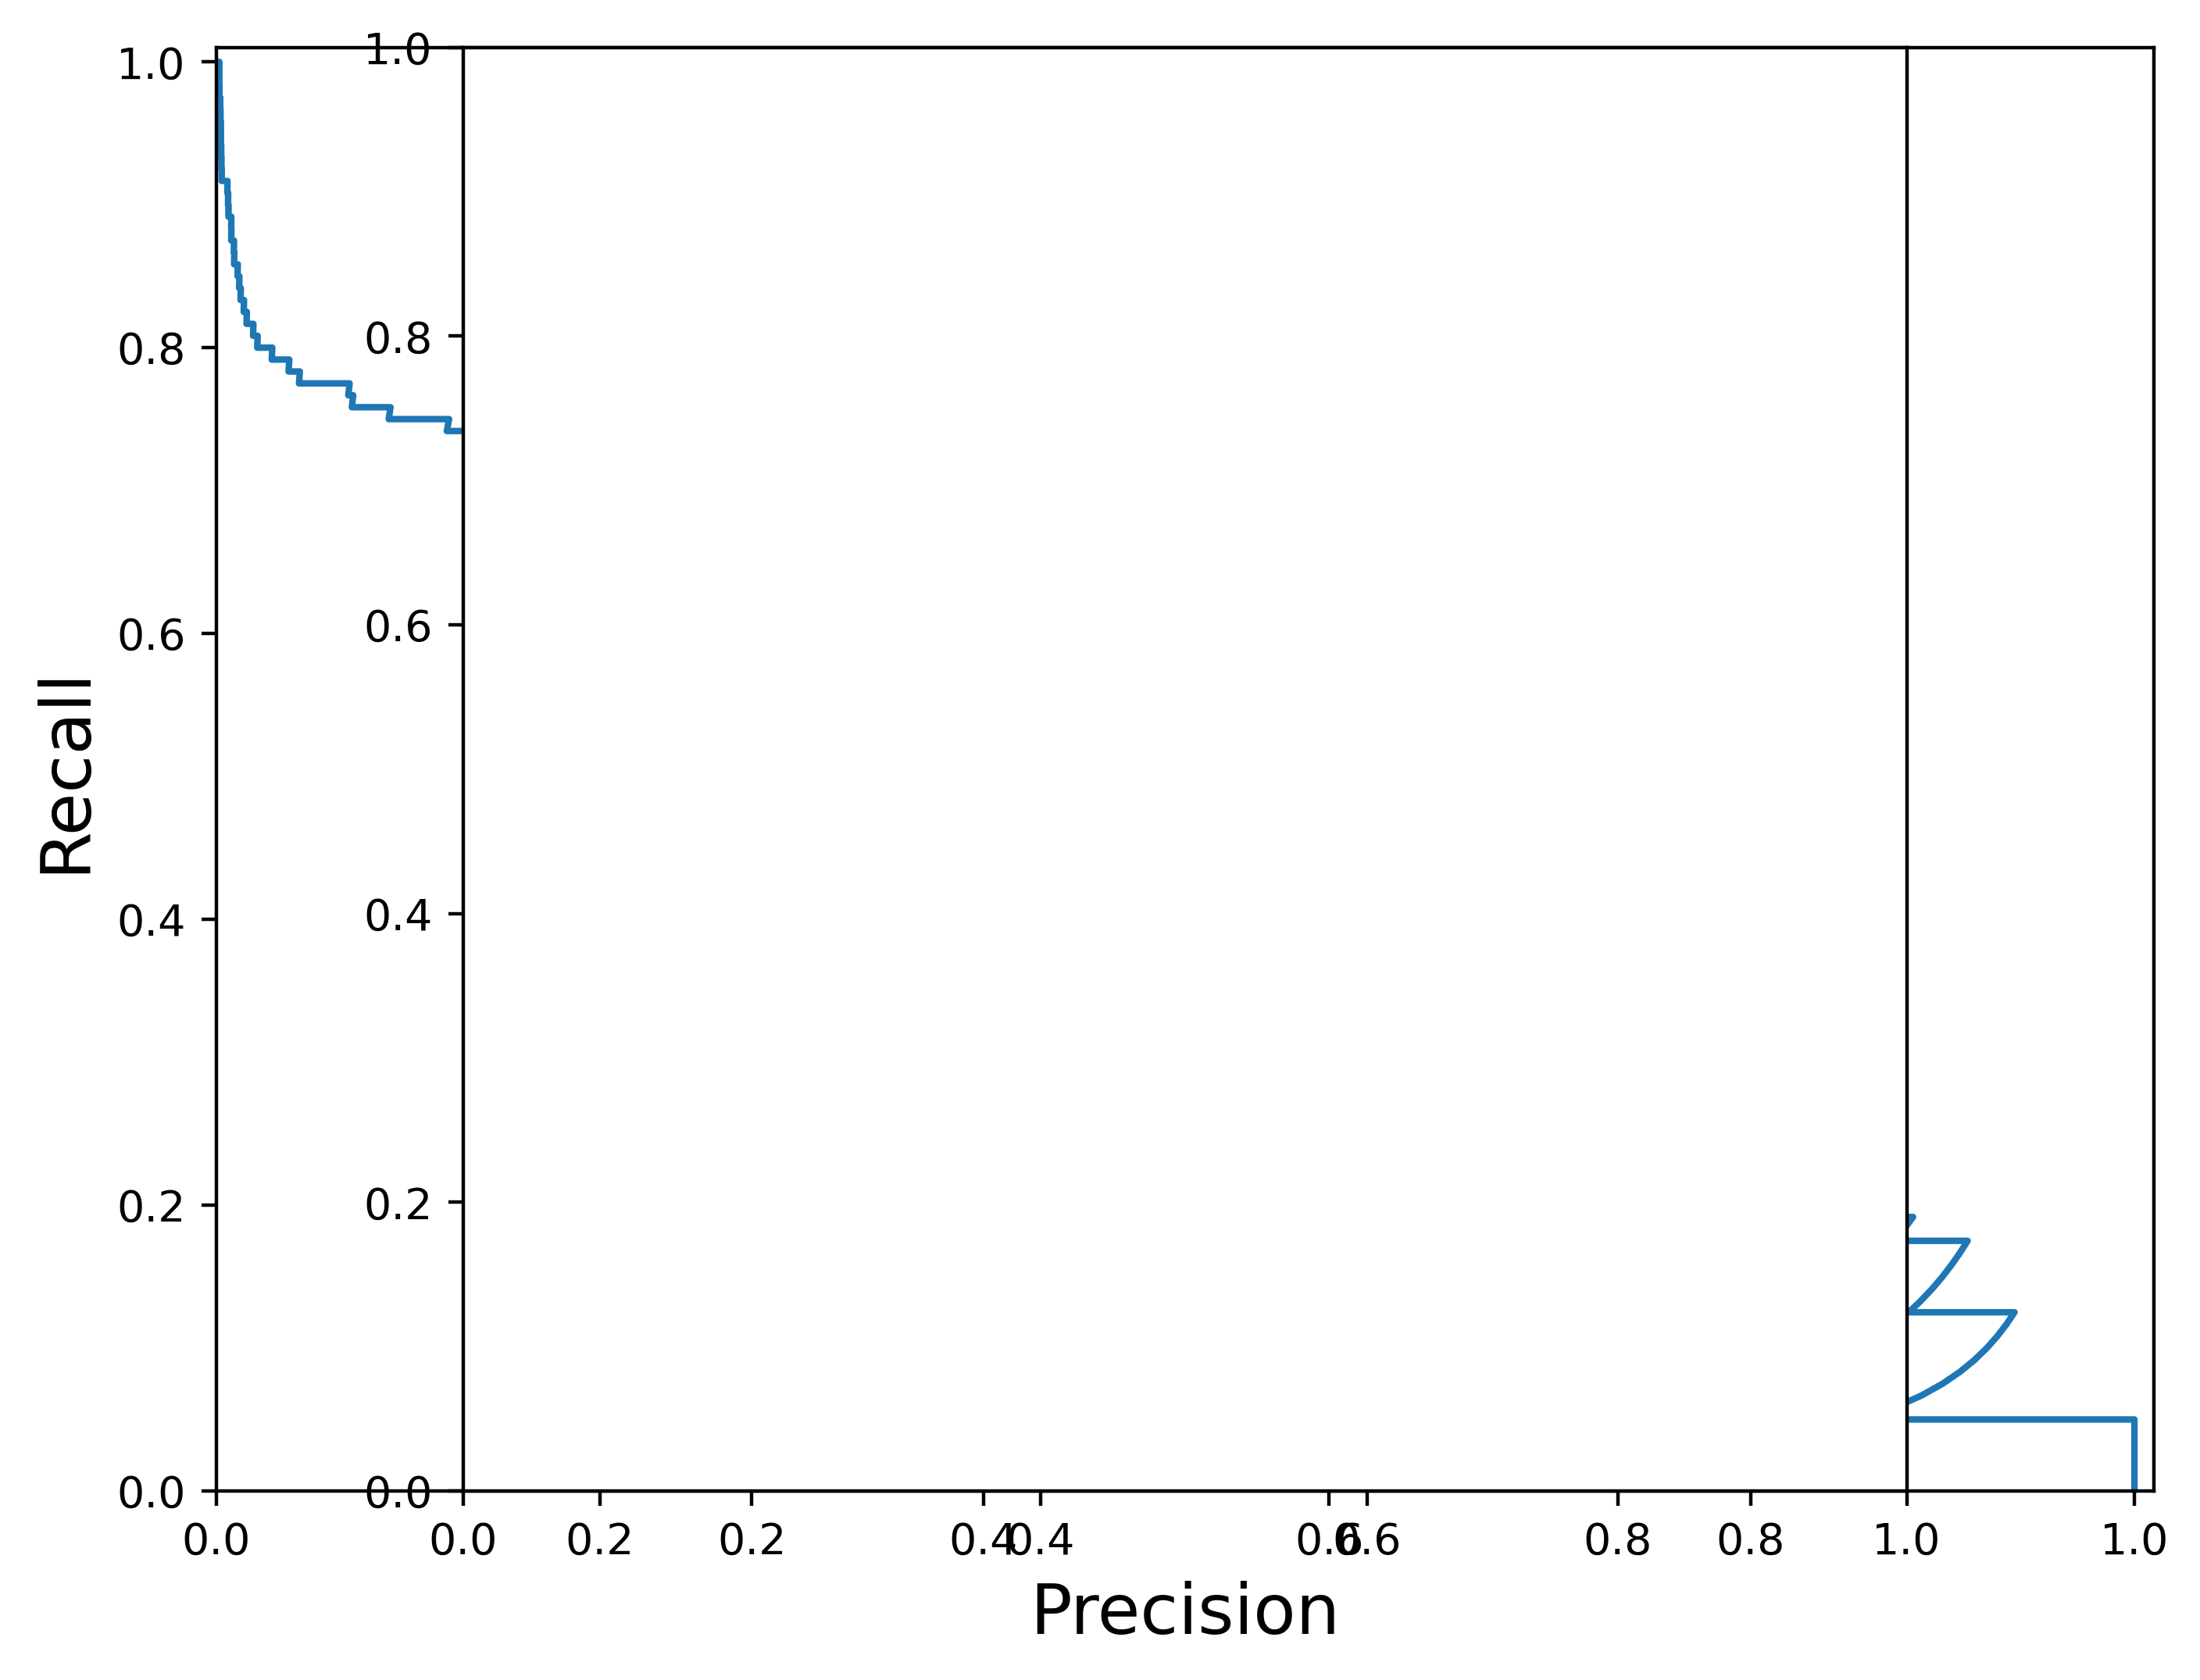

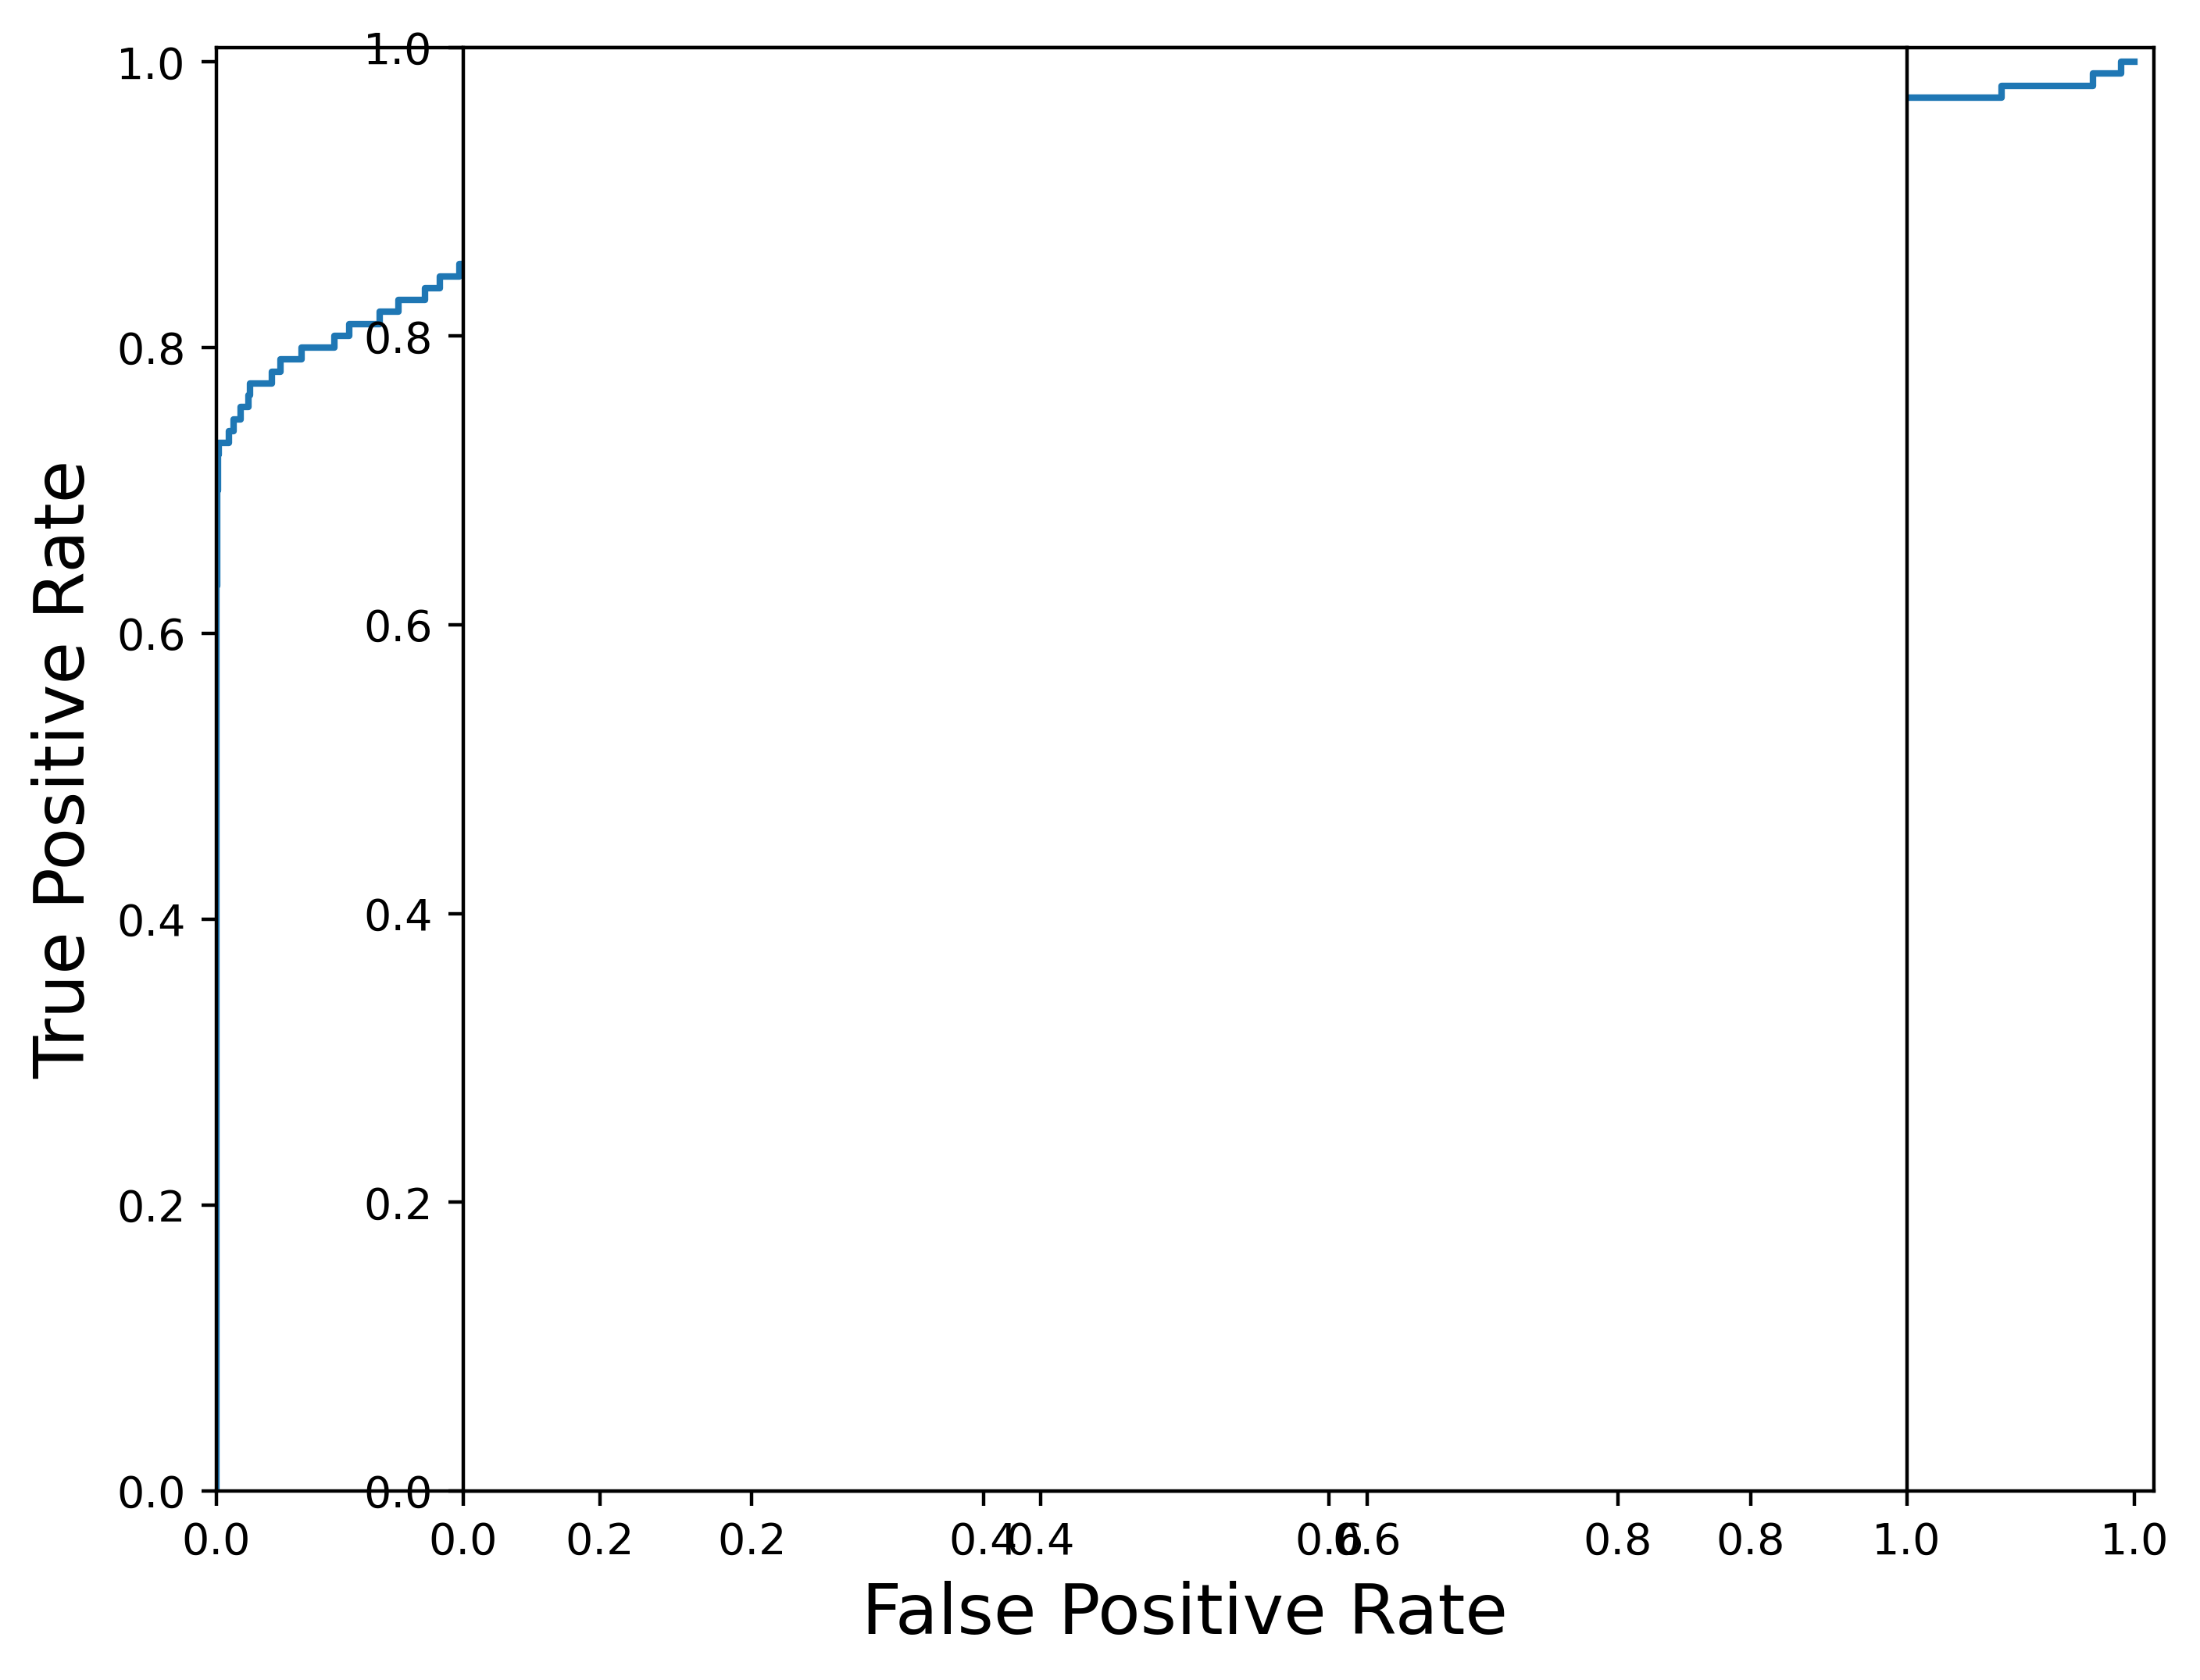

In [7]:
def plot_precision_recall_and_FPR_to_TPR():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt

    cls = LogisticRegression()
    cls.fit(X_train, y_train)
    y_prob = cls.decision_function(X_test)

    precision, recall, threshold1 = precision_recall_curve(y_test, y_prob)
    fpr, tpr, threshold2 = roc_curve(y_test, y_prob)

    recall_queried = recall[np.argmin(abs(precision - 0.750))]
    tpr_queried = tpr[np.argmin(abs(fpr - 0.160))]

    fig1=plt.figure(figsize=(8, 6), dpi=400)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(0.75, recall_queried, 'x', markersize = 0.5, fillstyle = 'none', c='r', mew=3)


    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    fig1.savefig("PrecisionRecallCurve.svg", format="svg")


    fig2=plt.figure(figsize=(8, 6), dpi=400)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(fpr, tpr, label='FPR - TPR Curve')
    plt.plot(0.16, tpr_queried, 'x', markersize = 0.5, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    fig2.savefig("TPR-FPR Curve.svg", format="svg")

plot_precision_recall_and_FPR_to_TPR()

In [8]:
def get_mean_test_scores():
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline([('clf', LogisticRegression()),])

    parameters = {'clf__penalty': ('l1', 'l2'), 'clf__C': (0.01, 0.1, 1, 10, 100)}
    grid= GridSearchCV(pipeline, param_grid=parameters, scoring='recall', verbose=2, cv=3)
    print(pipeline.get_params().keys())
    grid.fit(X, y)
    results = grid.cv_results_
    return results

results=get_mean_test_scores();

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .......................clf__C=0.01, clf__penalty=l1; total time=   0.0s
[CV] END .......................clf__C=0.01, clf__penalty=l1; total time=   0.0s
[CV] END .......................clf__C=0.01, clf__penalty=l1; total time=   0.0s
[CV] END .......................clf__C=0.01, clf__penalty=l2; total time=   0.7s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................clf__C=0.01, clf__penalty=l2; total time=   1.5s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......................clf__C=0.01, clf__penalty=l2; total time=   1.5s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   1.1s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   1.4s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........................clf__C=0.1, clf__penalty=l2; total time=   1.4s
[CV] END ..........................clf__C=1, clf__penalty=l1; total time=   0.0s
[CV] END ..........................clf__C=1, clf__penalty=l1; total time=   0.0s
[CV] END ..........................clf__C=1, clf__penalty=l1; total time=   0.0s
[CV] END ..........................clf__C=1, clf__penalty=l2; total time=   1.2s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..........................clf__C=1, clf__penalty=l2; total time=   1.4s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..........................clf__C=1, clf__penalty=l2; total time=   1.4s
[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l1; total time=   0.0s
[CV] END .........................clf__C=10, clf__penalty=l2; total time=   1.0s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .........................clf__C=10, clf__penalty=l2; total time=   1.5s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .........................clf__C=10, clf__penalty=l2; total time=   1.4s
[CV] END ........................clf__C=100, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=100, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=100, clf__penalty=l1; total time=   0.0s
[CV] END ........................clf__C=100, clf__penalty=l2; total time=   1.2s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........................clf__C=100, clf__penalty=l2; total time=   1.4s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fit

[CV] END ........................clf__C=100, clf__penalty=l2; total time=   1.5s


c:\Users\012728631\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
results

{'mean_fit_time': array([0.03877155, 1.30131976, 0.03182411, 1.38339106, 0.03677209,
        1.41551034, 0.03151433, 1.36689011, 0.03123236, 1.44547621]),
 'std_fit_time': array([0.00662747, 0.34132038, 0.00079895, 0.14289235, 0.00676015,
        0.1053567 , 0.00430061, 0.16753645, 0.00056008, 0.16009482]),
 'mean_score_time': array([0.        , 0.02617804, 0.        , 0.03155311, 0.        ,
        0.03138359, 0.        , 0.03206372, 0.        , 0.03138336]),
 'std_score_time': array([0.        , 0.00883874, 0.        , 0.00372302, 0.        ,
        0.00018546, 0.        , 0.01296824, 0.        , 0.00018809]),
 'param_clf__C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_clf__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
         

In [10]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(results['mean_test_score'].reshape(5, 2))

<IPython.core.display.Javascript object>